
# Jupiter/IPython notebook widgets

<br />

## Ivan (@vanzaj)

<br />

## PyData SG meetup, 13 Oct 2015


# code cells + markdown = ❤ ❤ ❤

In [1]:
print("Saluton mondo!")

Saluton mondo!


In [2]:
!python -m this | head -5 | tail -3

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.


In [4]:
from IPython.display import HTML, display
def embed_url(url, width=800, height=450):
    src='<iframe src="%s"  width="%d" height="%d"></iframe>' % (url, 800, 450)
    display(HTML(src))

In [5]:
embed_url('https://en.wikipedia.org/wiki/Literate_programming')

In [6]:
embed_url('http://worrydream.com/ExplorableExplanations/')

In [8]:
import ipywidgets as wdg

In [9]:
def f(x=1):
    print('OMG!' * x)

In [10]:
wdg.interact(f, x=5)

OMG!OMG!OMG!OMG!


In [12]:
import numpy as np

In [13]:
@wdg.interact(text='')
def h(text=''):
    res = ' '.join(np.random.permutation(text.split()))
    print(res)

more a one two some three


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-np.pi, np.pi, 128)

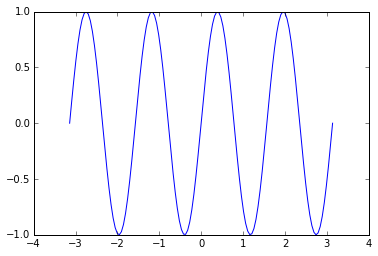

In [15]:
@wdg.interact(freq=(1,10))
def plot_sine(freq=1):
    y = np.sin(x*freq)
    plt.plot(x, y)

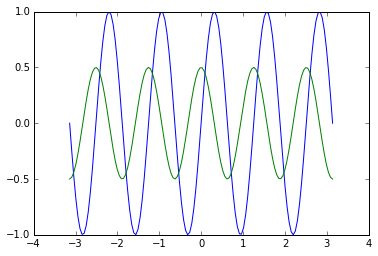

In [16]:
@wdg.interact(freq=(1,10), show_y1=False)
def plot_sine(freq=1, show_y1=False):
    y = np.sin(x*freq)
    plt.plot(x, y)
    if show_y1:
        y1 = 0.5 * np.cos(x*freq)
        plt.plot(x, y1)

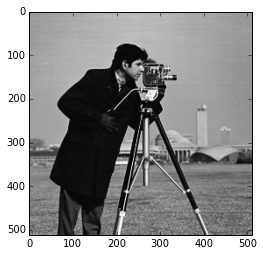

In [17]:
import skimage.data

img = skimage.data.camera()
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [18]:
cnames = [name for name in plt.colormaps() if name.endswith('_r')]

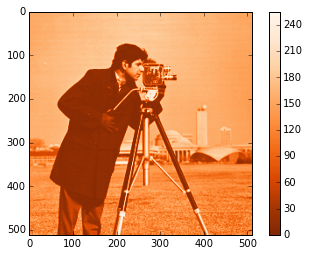

In [19]:
@wdg.interact(cname=cnames)
def showimg(cname=''):
    plt.imshow(img, cmap=plt.get_cmap(cname))
    plt.colorbar()

78

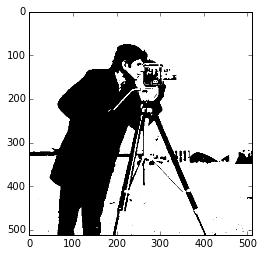

In [21]:
plt.set_cmap('gray')
def img_thres(thres=10):
    plt.imshow(img > thres)
    return thres

W = wdg.interactive(img_thres, thres=(0,255))
display(W)

In [22]:
print W.result

78


In [24]:
import nibabel as nib
vol = nib.load('../data/anon_anatomy.nii.gz').get_data()
vol.shape

(57, 67, 56)

In [28]:
def show_vol(data, x=0, y=0, z=0):
    plt.figure(figsize=(12, 4))
     
    plt.subplot(131)
    img = data[x, :,:]
    plt.imshow(img.T, origin='lower')
    
    plt.subplot(132)
    img = data[:, y, :]
    plt.imshow(img.T, origin='lower')

    plt.subplot(133)
    img = data[:, :, z]
    plt.imshow(img.T, origin='lower')

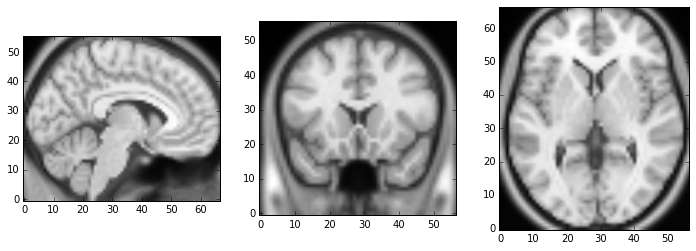

In [29]:
Sx, Sy, Sz = vol.shape
wdg.interact(show_vol, data=wdg.fixed(vol), x=(0, Sx-1), y=(0, Sy-1), z=(0, Sz-1))